In [3]:
#Step 1: Import libraries and load the Netflix dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv")  # Make sure it's in the same directory

#Step 2: Basic info
# Shows number of rows, columns, and column types
print(df.shape)
print(df.info())




(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [5]:
# Step 3: Check for missing values and duplicates
print(df.isnull().sum())
df.drop_duplicates(inplace=True)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


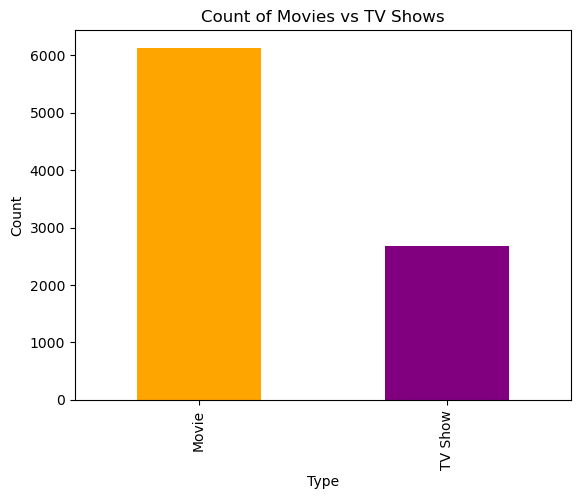

In [7]:
#Step 4: Most common content type
# Bar chart showing number of Movies vs TV Shows
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', color=['orange', 'purple'])
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()



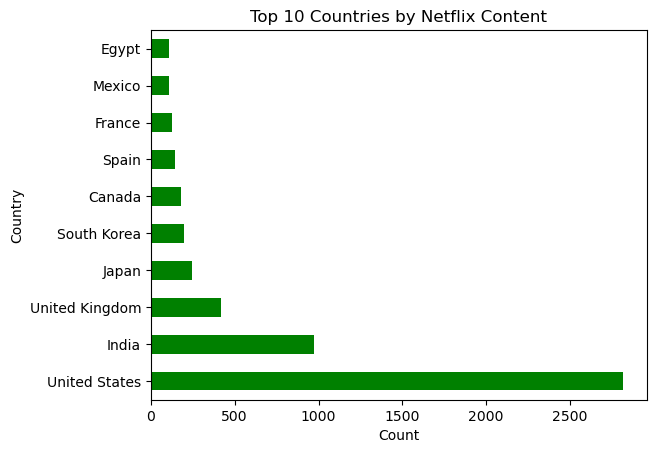

In [9]:
# Step 5: Top 10 countries with most content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='green')
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


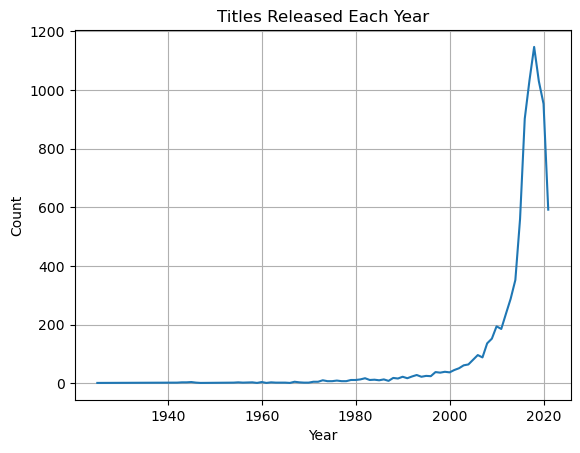

In [11]:

# Step 6: Titles released each year (line plot)
year_counts = df['release_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.title("Titles Released Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


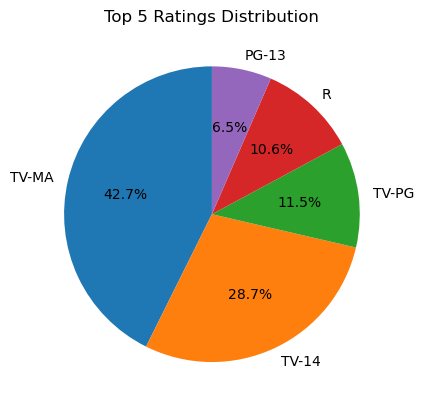

In [13]:

# Step 7: Pie chart of Ratings
ratings = df['rating'].value_counts().head(5)
ratings.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Ratings Distribution")
plt.ylabel("")
plt.show()



<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_1492\2687525431.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_1492\2687525431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)


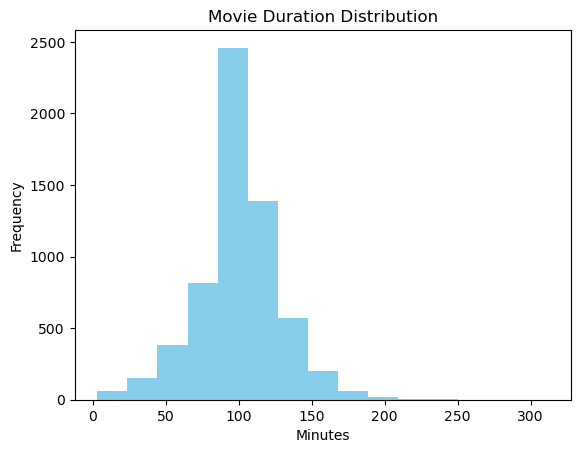

In [15]:
# Step 8: Duration column analysis (for Movies only)
movies = df[df['type'] == 'Movie']
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.hist(movies['duration_mins'].dropna(), bins=15, color='skyblue')
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()
